In [1]:
pip install biopython   #Installing biopython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import python and Biopython packages and modules
from Bio import SeqIO #import Biopython package SeqIO
from Bio.Data import CodonTable #import Biopython package CodonTable
from Bio import Seq #import Biopython package Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis #import ProteinAnalysis from ProtParam module
from Bio.SeqUtils import gc_fraction #import GC from Bio.SeqUtils module
import pandas as pd #import pandas package
import matplotlib.pyplot as plt #import matplotlib.pyplot package
import seaborn as sns #import seaborn package
import numpy as np #import numpy package

# Function 1: Extract DNA Sequences from a FASTA File

This function reads in a FASTA file and extracts DNA sequences. It uses Biopython's `SeqIO` module to parse the records. For each sequence, it extracts the genus and species name from the description and uses that as the dictionary key. The corresponding DNA sequence is stored as the value.

### Arguments:
- `fasta_fn` (str): File path to the FASTA file.

### Returns:
- `dict`: Dictionary with species names as keys and their nucleotide sequences as values.



In [2]:
"""
Function Description:
Extracts sequences from a FASTA file and returns them in a dictionary.
Arguments:
fasta_fn (str): The file path of the FASTA file.
Return Type:
dict: A dictionary containing species names as keys and sequences as values.
    """
def get_sequences_from_file(fasta_fn):                         #function takes a fasta file as arguement 
    sequence_data_dict = {}                                    #Define an empty dictionary for sequence data
    for record in SeqIO.parse(fasta_fn, "fasta"):              #For each FASTA record, use Biopython's SeqIO module
        description = record.description.split()               #Split the description line of the sequence into variables
        species_name = f"{description[1]} {description[2]}"   #Create species name (genus + species) separated by a white space
        sequence_data_dict[species_name] = record.seq          #Append the empty dictionary with the species name and sequences from previous step
    return sequence_data_dict                                  #Return a dictionary with species as key and corresponding sequences as value

#Testing function
fasta_fn = "penguins_cytb.fasta"
get_sequences_from_file(fasta_fn)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

# Function 2: Translate DNA to Amino Acids
This function mimics Dr. X's pseudocode. It translates a DNA sequence into an amino acid sequence using the vertebrate mitochondrial codon table. It processes the string three nucleotides at a time and stops translation at a stop codon or if an invalid codon is encountered.

In [3]:
def translate_function(string_nucleotides):
    """
    Translates a nucleotide sequence into an amino acid sequence.

    Args:
    - string_nucleotides (str): A string representing the nucleotide sequence.

    Returns:
    - str: A string representing the translated amino acid sequence.
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # Optional: print the mitochondrial codon table
    print(mito_table)
    aa_seq_string = ""
    # Always make sequence uppercase
    string_nucleotides = string_nucleotides.upper()

    # Loop over the sequence three nucleotides at a time
    for i in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.forward_table:
            amino_acid = mito_table.forward_table[codon]
            if amino_acid == '*':  # Stop codon
                break
            aa_seq_string += amino_acid
        else:
            break  # Stop if codon not recognized
    
    return aa_seq_string

# Test the function
string_nucleotide = 'ATACGTAGCTGGCCAAGGCCTTAAGGTGAAAT'
translated_sequence = translate_function(string_nucleotide)
print("Translated sequence:", translated_sequence)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

# Function 3: Translate DNA to Amino Acids (Biopython Approach)

This function offers a cleaner alternative to the manual translation function. It uses Biopython's `Seq` object and the `translate` method with the vertebrate mitochondrial codon table.

In [4]:
from Bio.Seq import Seq  # Correct import
def translate_sequence(nucleotide_string, table_name="Vertebrate Mitochondrial"):
    """
    Translates a nucleotide sequence into an amino acid sequence.

    Args:
    - nucleotide_string (str): DNA sequence as a string.
    - table_name (str): Name of the codon table (default is Vertebrate Mitochondrial).

    Returns:
    - str: Amino acid sequence.
    """
    # Clean the input: remove whitespace and make uppercase
    cleaned_sequence = ''.join(nucleotide_string.split()).upper()
    
    # Convert to Seq object
    seq_obj = Seq(cleaned_sequence)
    
    # Translate using specified table, stop at first stop codon
    protein = seq_obj.translate(table=table_name, to_stop=True)
    
    return str(protein)

# Test
string_nucleotide = 'ATACGTAGCTGGCCAAGGCCTTAAGGTGAAATA'
translated = translate_sequence(string_nucleotide)
print("Translated sequence:", translated)

Translated sequence: MRSWP


# Function 4: Compute Molecular Weight of Amino Acid Sequence

This function calculates the molecular weight of a protein sequence using Biopython's `ProteinAnalysis` tool. It returns the total weight in Daltons (Da).

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_sequence):
    """
    Computes the molecular weight of an amino acid sequence.

    Args:
    - aa_sequence (str): Amino acid sequence as a string.

    Returns:
    - float: Molecular weight of the sequence.
    """
    if not aa_sequence:
        raise ValueError("Input amino acid sequence is empty.")

    # Clean the input: remove whitespace and make uppercase
    clean_sequence = ''.join(aa_sequence.split()).upper()
    
    # Analyze sequence
    analysis = ProteinAnalysis(clean_sequence)
    
    return analysis.molecular_weight()

# Test the function
aa_seq = 'PAYVAQLSEW'
molecular_weight = compute_molecular_weight(aa_seq)
print(f"Molecular weight: {molecular_weight:.2f} Da")

Molecular weight: 1163.28 Da


# Function 5: Calculate GC Content of each DNA sequence

This function calculates the percentage of nucleotides in a DNA sequence that are either G or C. It helps measure the stability and complexity of the DNA.


In [6]:
def gc_content(dna_seq):
    """
    Computes the GC content of a DNA sequence.

    Args:
    - dna_seq (str): A string representing the DNA sequence.

    Returns:
    - float: The GC content of the DNA sequence as a percentage.
    """
    # Normalize the DNA sequence (remove spaces and convert to uppercase)
    dna_seq = dna_seq.replace(" ", "").upper()
    
    # Count G and C bases using list comprehension and sum function for efficiency
    count_gc = sum(1 for base in dna_seq if base in 'GC')
    
    # Calculate GC content percentage
    gc_percentage = (count_gc / len(dna_seq)) * 100 if len(dna_seq) > 0 else 0
    
    return gc_percentage

# Test the function
dna_seq = 'ATACGTAGCTGGCCAAGGCCTTAAGGTGAAAT'
print(gc_content(dna_seq))

46.875


### Loading Data and Sequences

In this section of the code, we are performing two main tasks:

1. **Loading Cytb Sequences:**
   - The function `get_sequences_from_file("penguins_cytb.fasta")` is used to load mitochondrial cytb (cytochrome b) sequences from a FASTA file named `penguins_cytb.fasta`. These sequences will be analyzed later for molecular weight and GC content.
   - We print the loaded sequences (`cytb_seqs`) to inspect the data and ensure that it has been successfully loaded.

In [7]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
print(cytb_seqs)

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

## Step 6: Initialize New Columns for Molecular Weight and GC Content

In this step, we:
- Read the penguin species data from the CSV file `penguins_mass.csv`.
- Added two new columns to the DataFrame:
  - **`molecular_weight`**: to store molecular weight values.
  - **`GC_content`**: to store GC content percentages.
- Initialized both new columns with `NaN` values to indicate that the data will be filled in later.

Printing the first few rows confirms that the new columns have been successfully added.



In [9]:
# Read the CSV file containing penguin species data
penguins_df = pd.read_csv("penguins_mass.csv")  # Data includes species and body mass

# Initialize new columns for molecular weight and GC content with NaN
# Using NaN (Not a Number) to indicate missing or uncalculated data
penguins_df['molecular_weight'] = pd.NA  #Initializing NaN representation for pandas
penguins_df['GC_content'] = pd.NA  # Placeholder for future GC content calculation

# Display the first few rows of the DataFrame to verify column initialization
print(penguins_df.head())

                   species   mass molecular_weight GC_content
0     Aptenodytes forsteri  28.00             <NA>       <NA>
1  Aptenodytes patagonicus  13.40             <NA>       <NA>
2      Eudyptes chrysocome   2.80             <NA>       <NA>
3    Eudyptes chrysolophus   4.50             <NA>       <NA>
4        Eudyptes sclateri   4.25             <NA>       <NA>


# Step7: Calculate Molecular Weight and GC Content for Each Penguin Species

In this step, we:
- Used a `for` loop to process each penguin species' DNA sequence from the `cytb_seqs` dictionary.
- For each sequence:
  - Translated the DNA sequence into an amino acid sequence.
  - Calculated the molecular weight of the amino acid sequence.
  - Calculated the GC content of the original DNA sequence.
- Updated the `penguins_df` DataFrame by filling in the `molecular_weight` and `GC_content` columns for each species.
- Printed the entire updated DataFrame after completing all calculations.


In [10]:
from Bio.Seq import Seq

# Computes GC content and molecular weight for each sequence
for key, value in cytb_seqs.items():
    aa_seq = translate_sequence(str(value))  # Convert Seq to string
    molecular_weight = compute_molecular_weight(aa_seq)
    GC_content = gc_content(str(value))
    
    # Update DataFrame
    penguins_df.loc[penguins_df['species'] == key, 'molecular_weight'] = molecular_weight
    penguins_df.loc[penguins_df['species'] == key, 'GC_content'] = GC_content

# Print ONCE after all processing is done
print(penguins_df)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021  48.381452
1   Aptenodytes patagonicus  13.40       42563.7067  49.693788
2       Eudyptes chrysocome   2.80       42475.5753  51.181102
3     Eudyptes chrysolophus   4.50       42445.5493  50.918635
4         Eudyptes sclateri   4.25       42475.5753  50.831146
5           Eudyptula minor   1.60       42491.6408  49.256343
6        Pygoscelis adeliae   4.60        42458.614  49.081365
7     Pygoscelis antarctica   4.10       42404.5423  47.769029
8          Pygoscelis papua   6.10       42595.8759  47.156605
9       Spheniscus demersus   3.20        42431.549  48.293963
10     Spheniscus humboldti   4.75        42399.552  49.256343
11  Spheniscus magellanicus   3.40       42459.6021  48.206474


## Step 8: Plot Penguin Mass by Species and Answer Questions

In this step, we:
- Sorted the `penguins_df` DataFrame by body mass in ascending order.
- Created a bar chart showing the body mass of each penguin species, with the species names labeled on the x-axis.
- Used the 'viridis' color palette to improve the visual appeal of the chart.
- Rotated the x-axis labels for better readability.

### Answers:
- **Q1**: The smallest penguin species was identified based on the lowest mass in the sorted DataFrame.
- **Q2**: The geographical range of the smallest species was described as being distributed in the coastal waters of southern mainland Australia and Tasmania.


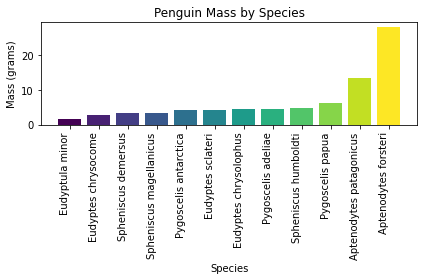

Q1. The smallest penguin species is 'Eudyptula minor'.
Q2. They are geographically distributed in: The species is geographically distributed in the coastal waters of southern mainland Australia and Tasmania.


In [12]:
# Sorting the DataFrame by 'mass' in ascending order
sorted_df = penguins_df.sort_values(by='mass')

# Use the 'viridis' color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_df)))

# Create the bar chart
plt.bar(sorted_df["species"], sorted_df["mass"], color=colors)
plt.xlabel('Species')
plt.ylabel('Mass (grams)')
plt.title('Penguin Mass by Species')
plt.xticks(rotation=90, ha='right')  # Rotates x-axis labels for better readability
plt.tight_layout()  # Ensures the plot fits within the figure area
plt.show()

# Answering the questions
# Q1: The smallest penguin species
smallest_species = sorted_df.iloc[0]  # Since DataFrame is sorted, first row is the smallest
print(f"Q1. The smallest penguin species is '{smallest_species['species']}'.")

# Q2: Geographical range of the smallest species
geographical_range = "The species is geographically distributed in the coastal waters of southern mainland Australia and Tasmania."
print(f"Q2. They are geographically distributed in: {geographical_range}")


## Step 9: Visualize Molecular Weight as a Function of GC Content

In this step, we:
- Created a scatter plot with:
  - **GC content** on the x-axis.
  - **Molecular weight** on the y-axis.
- Enhanced the plot by:
  - Setting the figure size for better visibility.
  - Using the 'coolwarm' color palette to represent molecular weight variation.
  - Adding bold and clear axis labels and a title.
  - Including a grid with dashed lines to improve readability.
- Used larger points with black edges and semi-transparency to make overlapping points easier to interpret.


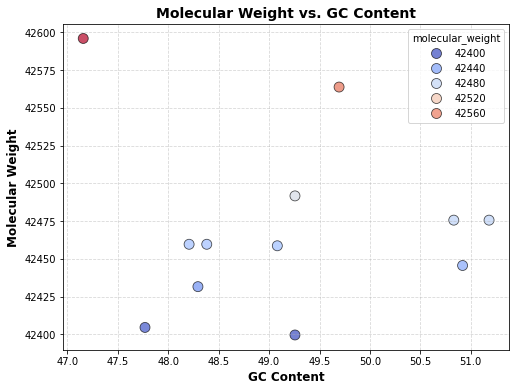

In [13]:
# Set a different color palette
sns.set_palette("viridis")

# Create the scatter plot with improved styling
plt.figure(figsize=(8, 6))  # Set figure size
sns.scatterplot(data=penguins_df, x='GC_content', y='molecular_weight', 
                hue='molecular_weight', palette='coolwarm', s=100, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('GC Content', fontsize=12, fontweight='bold')
plt.ylabel('Molecular Weight', fontsize=12, fontweight='bold')
plt.title('Molecular Weight vs. GC Content', fontsize=14, fontweight='bold')

# Show the plot with a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

# Step10: Saving the DataFrame to a CSV File
In this step, we:
- Saved the updated `penguins_df` DataFrame to a new CSV file named **'penguins_mass_cytb.csv'**.
- Used the `index=False` argument to exclude the DataFrame index from being written to the CSV file.

This ensures that our data is saved in a clean format without the index column, which can be useful for further analysis or sharing.


In [14]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False) #saving as a .csv file.

# Step11: Bonus 

## Generating Summary Statistics for the DataFrame

In this step, we:
- Used the `describe()` method on the `penguins_df` DataFrame to generate summary statistics for numerical columns.
- The summary statistics include measures like:
  - **Count**: Number of non-null entries.
  - **Mean**: Average value.
  - **Standard Deviation**: Measure of data spread.
  - **Min/Max**: Minimum and maximum values.
  - **25%, 50%, 75% Percentiles**: Distribution of data.

This step helps in getting an overview of the data and identifying potential outliers or patterns in the numerical variables.


In [15]:
# Summary statistics
summary_stats = penguins_df.describe()
print(summary_stats)

            mass
count  12.000000
mean    6.725000
std     7.318144
min     1.600000
25%     3.350000
50%     4.375000
75%     5.087500
max    28.000000


## Visualizing the Distribution of Penguin Body Mass

In this step, we:
- Created a **histogram** using the `sns.histplot()` function to visualize the distribution of penguin body mass.
- Enabled the **Kernel Density Estimate (KDE)** to show the smooth distribution curve alongside the histogram.
- Customized the plot by:
  - Setting the color of the histogram to **skyblue**.
  - Adding a **title** to the plot: "Distribution of Penguin Body Mass".
  - Labeling the x-axis as "Body Mass (grams)" and the y-axis as "Frequency" to clarify the plot's meaning.

This plot helps to understand how the penguin body mass is distributed across the dataset.

### Output: 
There are two outliers we detected from the graph. 

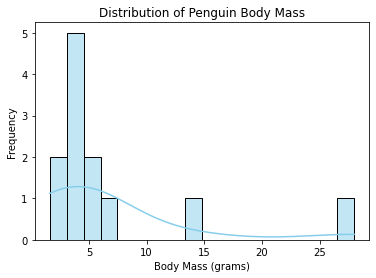

In [16]:
# Distribution of body mass
sns.histplot(penguins_df['mass'], kde=True, color='skyblue')
plt.title("Distribution of Penguin Body Mass")
plt.xlabel("Body Mass (grams)")
plt.ylabel("Frequency")
plt.show()

## Exploratory Data Analysis: Pairplot

In this step, we:
- Used the `sns.pairplot()` function to generate pairwise scatter plots for all numerical columns in the `penguins_df` DataFrame.
- The **hue** parameter was set to **"species"**, which colors the points based on their species, allowing us to visually distinguish the different species.
- This plot is useful for identifying relationships and patterns between pairs of variables in the dataset, and for detecting potential outliers or clusters based on species.

The pairplot helps in exploring the correlations and distributions of the variables visually.


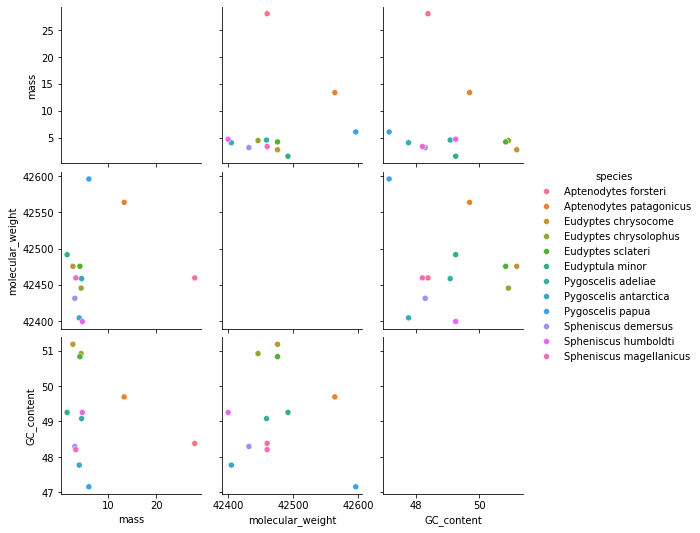

In [17]:
# Pairplot for exploratory data analysis
sns.pairplot(penguins_df, hue="species")
plt.show()

## Bar Chart of GC Content by Species
This bar chart visualizes the GC content for each species, with:
- **Value labels** on top of each bar to show GC content percentages.
- **Grid lines** on the y-axis for easier comparison.

This enhanced plot provides a clean, readable view of GC content variation across species.


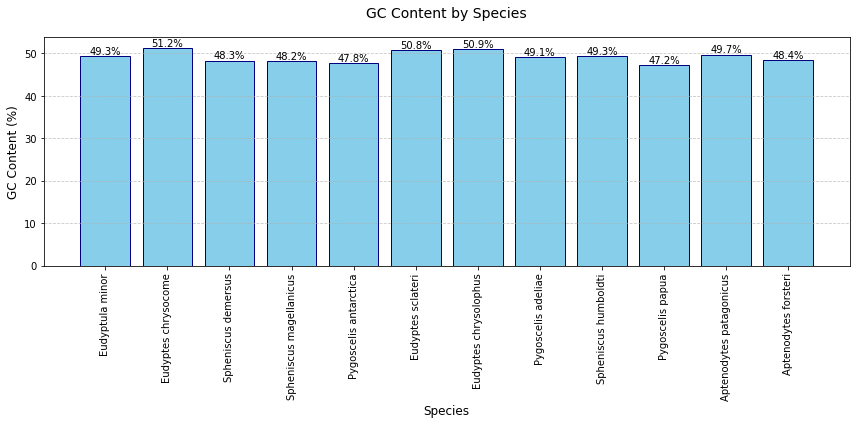

In [20]:
# Enhanced version with better readability
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_df["species"], sorted_df["GC_content"], 
               color='skyblue', edgecolor='navy')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.xlabel('Species', fontsize=12)
plt.ylabel('GC Content (%)', fontsize=12)
plt.title('GC Content by Species', fontsize=14, pad=20)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()